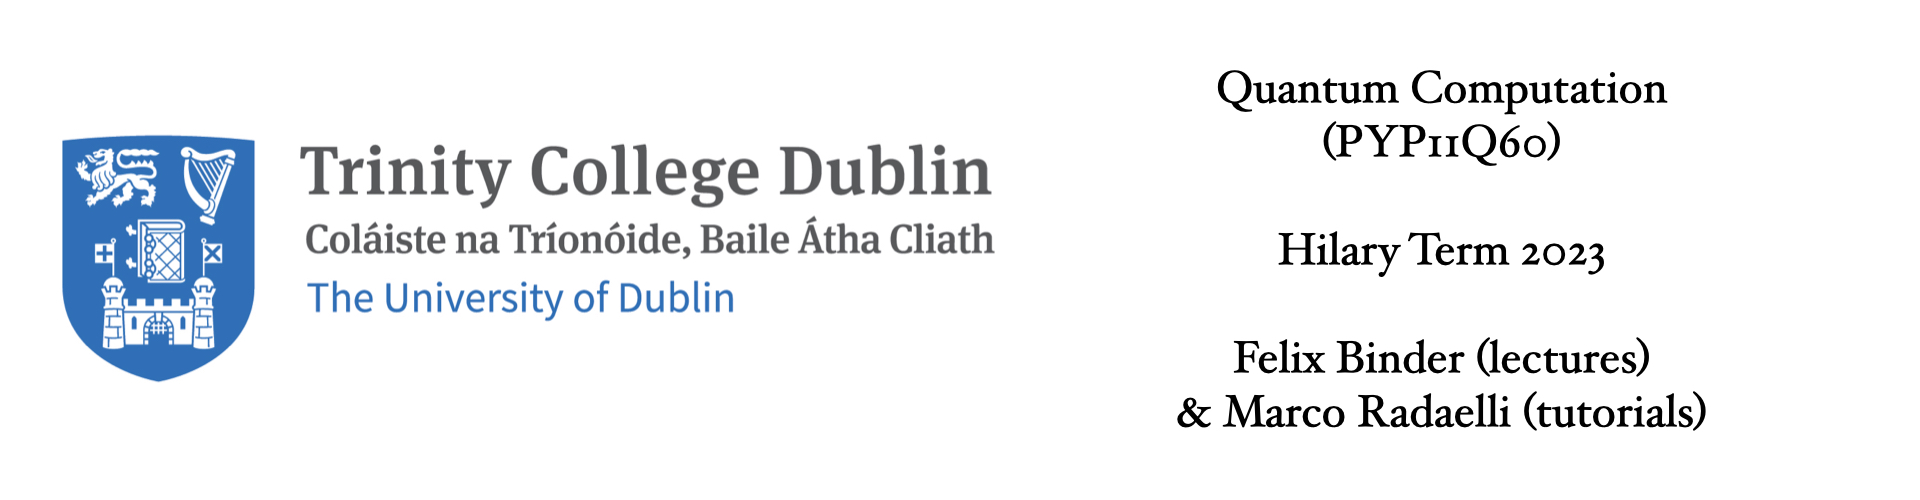

# Problem set 3

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 3.0 - Dependencies
Please add all relevant dependencies for the problems to the following cell and avoid the <code>import</code> command elsewhere.

In [1]:
import numpy as np
import random
import qiskit
import math
from matplotlib import pyplot as plt
from numpy import pi
#importing Qiskit 
from qiskit.circuit.library import TGate
from qiskit.circuit.library import PhaseGate
from qiskit.circuit.library import RZGate
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit import assemble 
from math import pi, sqrt
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector


# 3.1 - Quantum Fourier Transform (3 pts.)

Consider the unitary operator $\mathcal{F}$ for the Quantum Fourier Transform (QFT)
$$\mathcal{F} \ket{j} = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi i j k /N}\ket{k}.$$
<ol>
    <li>Compute explicitly the Fourier transform on the $n$ qubits state $\ket{0\ldots 0}$</li>
    <li>We already know a quantum circuit for $\mathcal{F}$ from the lectures. In Qiskit, create that circuit for 5 qubits, and transform it into a gate using the appropriate functions.</li>
        <li>Give a quantum circuit for the inverse Quantum Fourier Transform (i.e., for the operator $\mathcal{F}^\dagger$) on 5 qubits. Create that circuit in Qiskit and also transform it into a gate.</li>
    <li>Again using Qiskit, create the circuits $\mathcal{F}\mathcal{F}^\dagger$ and $\mathcal{F}^\dagger\mathcal{F}$. Obtain the matrix representation of the two circuits, and show that it is equal to the identity in both cases.</li>
</ol>

In [2]:
#to build a QFT with n qubits we first create a function that rotates the qubits 
#For 3 qubits
circ=QuantumCircuit(3)
circ.h(2) 
circ.cp(pi/2,1,2)
circ.cp(pi/4,0,2)
circ.h(1)
circ.cp(pi/2,0,1)
circ.h(0)
circ.swap(0,2)

def QFT_Rotations(circuit,n):
    if n==0: #Exit function if circuit is empty
        return circuit
    n -= 1 #Indexes start from 0
    circuit.h(n) #apply the Hadamard gate to the most significant qunbit
    for qubit in range(n): 
        circuit.cp(pi/2**(n-qubit),qubit,n)
    QFT_Rotations(circuit,n)
def swap_registers(circuit,n):
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit
def QFT(circuit,n): #QFT on the first n qubits in circuit
    QFT_Rotations(circuit,n)
    swap_registers(circuit,n)
    return circuit
circ=QuantumCircuit(4)
QFT_Rotations(circ,4)
circ.draw()    


┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘

In [3]:
def invesrse(circ,n):
    for qubit in range(n//2):
        circ.swap(qubit,n-qubit-1)
    for i in range(n):
        for m in range(i):
            circ.cp(-np.pi/float(2**(i-m)),m,i)
        circ.h(i)

def QFT_rotations(circuit,n):
    if n==0: #If circuit is empty
        return circuit
    n-=1 
#-= substracts a value from the variable and assign the result to that variable 
    circuit.h(n) #apply a hadamard gate to the most significant qubit
    for qubit in range(n): #for each less significant qubit, do a controlled rotation CROT
        circuit.cp(pi/2**(n-qubit),qubit,n)
    QFT_rotations(circuit,n)

def QFT(circuit,n):  #QFT on the first n qubits in circuit
    QFT_rotations(circuit,n)
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit

#TRansform it into a gate and get Dagger
circ=QuantumCircuit(5)
invesrse(circ,5)
qft_dagger=circ.to_gate()
circ.draw()

┌───┐                                                            »
q_0: ─X─┤ H ├─■──────────────■───────────────────■───────────────────────»
      │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─┼───X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │   │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─┼───┼──────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      │   │                                      │P(-π/8) └───┘ │P(-π/4) »
q_3: ─┼───X──────────────────────────────────────■──────────────■────────»
      │                                                                  »
q_4: ─X──────────────────────────────────────────────────────────────────»
                                                                         »
«                                                                  
«q_0: ─■───────────────────────────────────────────────────────────
«      │                                                           
«q_1: ─┼────────────────────■──────────────────────────────────────
«      │                    │                                      
«q_2: ─┼──────────■─────────┼──────────────■───────────────────────
«      │          │P(-π/2)  │        ┌───┐ │                       
«q_3: ─┼──────────■─────────┼────────┤ H ├─┼─────────■─────────────
«      │P(-π/16)            │P(-π/8) └───┘ │P(-π/4)  │P(-π/2) ┌───┐
«q_4: ─■────────────────────■──────────────■─────────■────────┤ H ├
«                                                             └───┘

Inverse

In [4]:
circ=qiskit.QuantumCircuit(5)
QFT(circ,5)
QFT=circ.to_gate(label="QFT")
circ.draw()

»
q_0: ──────■─────────────────────────────────────────■─────────────────────────»
           │                                         │                         »
q_1: ──────┼─────────■───────────────────────────────┼────────■────────────────»
           │         │                               │        │                »
q_2: ──────┼─────────┼────────■──────────────────────┼────────┼────────■───────»
           │         │        │                ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) »
q_3: ──────┼─────────┼────────┼────────■───────┤ H ├─■────────■────────■───────»
     ┌───┐ │P(π/16)  │P(π/8)  │P(π/4)  │P(π/2) └───┘                           »
q_4: ┤ H ├─■─────────■────────■────────■───────────────────────────────────────»
     └───┘                                                                     »
«                                          ┌───┐   
«q_0: ──────■──────────────────────■───────┤ H ├─X─
«           │                ┌───┐ │P(π/2) └───┘ │ 
«q_1: ──────┼────────■───────┤ H ├─■─────────X───┼─
«     ┌───┐ │P(π/4)  │P(π/2) └───┘           │   │ 
«q_2: ┤ H ├─■────────■───────────────────────┼───┼─
«     └───┘                                  │   │ 
«q_3: ───────────────────────────────────────X───┼─
«                                                │ 
«q_4: ───────────────────────────────────────────X─
«

Matrix representation

In [5]:
def invesrse(circ,n):
    for qubit in range(n//2):
        circ.swap(qubit,n-qubit-1)
    for i in range(n):
        for m in range(i):
            circ.cp(-np.pi/float(2**(i-m)),m,i)
        circ.h(i)

def QFT_rotations(circuit,n):
    if n==0: 
        return circuit
    n-=1 
    circuit.h(n) 
    for qubit in range(n): 
        circuit.cp(pi/2**(n-qubit),qubit,n)
    QFT_rotations(circuit,n)

def QFT(circuit,n):  
    QFT_rotations(circuit,n)
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit

circ=QuantumCircuit(5)
invesrse(circ,5)
qft_dagger=circ.to_gate()


circ=qiskit.QuantumCircuit(5)
QFT(circ,5)
QFT=circ.to_gate(label="QFT")



mx = np.arange(5)
mx = list(mx)


circ1 = QuantumCircuit(5)
circ1.append(qft_dagger,mx)
circ1.append(QFT,mx)
backend = Aer.get_backend('unitary_simulator')
job = execute(circ1, backend)
result = job.result()
print(result.get_unitary(circ1, decimals=2))

Operator([[ 1.-0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.-0.j,  0.+0.j, ..., -0.+0.j,  0.+0.j, -0.+0.j],
          [-0.+0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j, -0.-0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  1.-0.j,  0.+0.j],
          [ 0.+0.j,  0.-0.j,  0.+0.j, ..., -0.-0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))


In [6]:
circ2=QuantumCircuit(5)
circ2.append(QFT,mx)
circ2.append(qft_dagger,mx)
backend=Aer.get_backend('unitary_simulator')
job=execute(circ2,backend)
result=job.result()
print(result.get_unitary(circ2,decimals=2))

Operator([[ 1.-0.j, -0.-0.j, -0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.-0.j, -0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.-0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.-0.j],
          ...,
          [-0.+0.j, -0.+0.j, -0.-0.j, ...,  1.-0.j, -0.+0.j, -0.+0.j],
          [-0.-0.j, -0.+0.j, -0.+0.j, ...,  0.+0.j,  1.-0.j, -0.+0.j],
          [-0.+0.j, -0.-0.j, -0.-0.j, ...,  0.+0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))


# 3.2 - Quantum Phase Estimation (8 pts. total)

## 3.2.a Qiskit code /1 (4 pts.)

<ol>
    <li>In Qiskit, create the quantum circuit for quantum phase estimation of a <code>T-gate</code>. How many qubits do you need to consider to obtain an exact value for the phase for the eigenstate $\ket{0}$? How many for the eigenstate $\ket{1}$?</li>
    <li>Create a complete Python function <code>phase_estimation(oracle, eigenstate, number_qubits)</code> which performs the phase estimation for a generic oracle <code>oracle</code> on the eigenstate <code>eigenstate</code>, employing <code>number_qubits</code> qubits. The function should perform a quantum simulation, and return the estimated value of the phase (i.e., to bit-precision of <code>number_qubits</code>). Apply the function to the <code>T-gate</code> of the previous exercise, and verify that it works as expected.</li>
    <li>Now, run the function with a different oracle, given by $R_z\left(\frac{1}{3}\right)$. What happens?</li>
    <li>In a graph, plot the highest-probability result obtained for the phase estimation of $R_z\left(\frac{1}{3}\right)$, as a function of the number of employed qubits <code>number_qubits</code>.</li>
</ol>

**Circuit for quantum phase estimation**


In [7]:

#set up the circuit using 4 qubits
#initialize the state to 1 by applying x gate
#qpe = quantum phase estimation
phase_estimation = QuantumCircuit(4,3) #set up circuit, qubit 3 is the eigenstate of the unitary operator.
for qubit in range(3):
    phase_estimation.h(qubit) #hadamard to counting qubits
phase_estimation.x(3) #prepare eigenstate |psi>
#perform the controlled unitary operations
angle=2*np.pi/3 #controlled U operations
repetitions=1
for counting_qubit in range(3): 
    for i in range(repetitions):
        phase_estimation.cp(angle,counting_qubit,3);
    repetitions*=2
#Inverse Quantum Fourier Transform
def qft_dagger(qc, n): #Inverse of the Quantum fourier transform which is QFT dagger
    #we use the inverse QFT to translate the phase of U from the fourier basis into the computational basis so we can measure it.
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

qft_dagger(phase_estimation,3) 
for n in range(3): #measurement
    phase_estimation.measure(n,n) 
    
phase_estimation.draw()






┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                  ┌───┐                                   ┌─┐           
«q_0: ───────────X─┤ H ├─■──────────────■──────────────────┤M├───────────
«                │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘     ┌─┐   
«q_1: ───────────┼───────■────────┤ H ├─┼─────────■─────────╫──────┤M├───
«                │                └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────X──────────────────────■─────────■─────────╫─┤ H ├─╫─┤M├
«      │P(2π/3)                                             ║ └───┘ ║ └╥┘
«q_3: ─■────────────────────────────────────────────────────╫───────╫──╫─
«                                                           ║       ║  ║ 
«c: 3/══════════════════════════════════════════════════════╩═══════╩══╩═
«                                                           0       1  2

**Function for phase estimation**


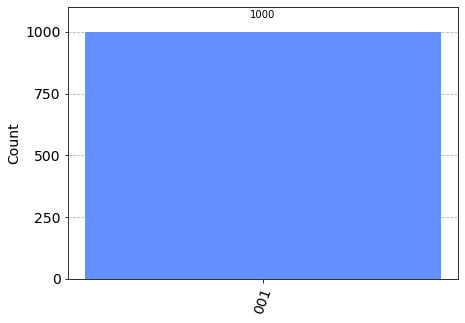

In [8]:

#set up the circuit using 4 qubits set up circuit, qubit 3 is the eigenstate of the unitary operator.
#initialize the state to 1 by applying x gate
#QPE = quantum phase estimation
def phase_estimation(oracle,eigenstate,n_qubits): #quantum phase estimation definition of function
    phase_estimation=QuantumCircuit(n_qubits,n_qubits-1)  #4 qubits circuit, only measure the first 3 classical bits to store de information, that's why the n-1    
    if eigenstate==1:
        phase_estimation.x(n_qubits-1) #prepare eigenstate |psi>
    phase_estimation.barrier()#barrier to separate the circuit 
    for qubit in range(n_qubits-1):
        phase_estimation.h(qubit) #hadamard to counting qubits
    phase_estimation.barrier() 
    cU=oracle.to_gate(label='cU').control(1) 
    repetitions=1
    
    for i in range(n_qubits-1):
        for k in range(repetitions):
            phase_estimation.append(cU,[i,n_qubits-1]); 
        repetitions*=2 
    phase_estimation.barrier()
    
#Inverse Quantum Fourier Transform
    def qft_dagger(qc, n):
#we use the inverse QFT to translate the phase of U from the fourier basis into the computational basis so we can measure it.
        for qubit in range(n//2):
            qc.swap(qubit, n-qubit-1)

        for i in range(n):
            for j in range(i):
                qc.cp(-np.pi/float(2**(i-j)), i, j)
            qc.h(i)  #Hadamard-gate on each qubit 
  #apply qft inverse to the circuit
    qft_dagger(phase_estimation,3)
    phase_estimation.barrier()

#measurement
    for qubit in range(n-1):
        phase_estimation.measure([qubit],[qubit])
    
#Running and Transpiling
    aer_sim=Aer.get_backend('aer_simulator')
    t=transpile(phase_estimation, aer_sim) 
    qobj=assemble(t, shots=1000)
    results=aer_sim.run(qobj).result() 
    answer=results.get_counts() 
#Plot
    return plot_histogram(answer)
    phase_estimation.draw()
        
#T-gate
T_gate=QuantumCircuit(1) #Single qubit gate 
T_gate.p(np.pi/4,0)
T_gate.to_gate(label='T')

phase_estimation(T_gate,0,4)

T_gate=QuantumCircuit(1) 
T_gate.p(np.pi/4,0) 
T_gate.to_gate(label='T') 

phase_estimation(T_gate,1,4)



we get the result 001 with certainty which in decimals is equal to 1, so when we divide the result by ${2^n}$ in which n=3 (number of qubits) to get theta: $\theta = \frac{1}{2^3}=\frac{1}{8}$

We need 3 qubits to get eigenstate |1> since in here $\theta = \frac{1}{2^3}$ so we need 1 (in decimal) and that correspond to the number of qubits.



**Rz**

$\theta = \frac{1}{3}$ 

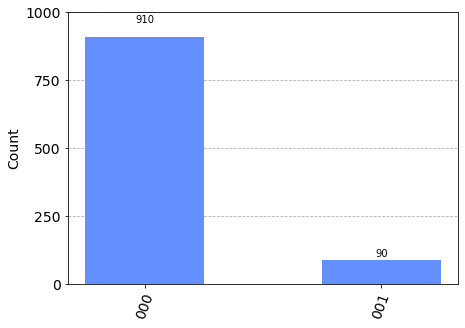

In [9]:
Rz=QuantumCircuit(1) 
Rz.rz(1/3,0) 
Rz.to_gate(label='Rz') 

phase_estimation(Rz,0,4) #|state>=0

Rz=QuantumCircuit(1)
Rz.rz(1/3,0)  
Rz.to_gate(label='Rz') 

phase_estimation(Rz,1,4)#|state>=1"

We reach an ideal level of accuracy above a certain number of qubits, the more qubits we have, the more accurate is the result.

## 3.2.b Analytical treatment of the error (4 pts.)
After the controlled application of the oracle, but before the final QFT, the state of the first $m$-qubit register is:
$$\ket{\theta} = \frac{1}{2^m} \sum_{k=0}^{2^m-1} e^{2\pi i k \theta} \ket{k}$$
where $\theta$ is the parameter to be estimated. 

<ol>
    <li>Apply the QFT to $\ket{\theta}$, and give an analytical expression for the output state.</li>
    <li>Determine the probability to obtain an outcome $j \in \{0,\ldots,2^m-1\}$ when performing the measurement.</li>
    <li>Show that, if there exists a $j=\tilde{j}$ such that $\theta=\frac{\tilde{j}}{2^m}$ (i.e., $\theta$ has an exact representation in $m$ bits), then the outcome of the measurement is $j$ with unit probability.</li>
    <li>If this is not the case, let $j^*$ be the specific value of $j$ which gives the best estimate $\frac{j^*}{2^m}$ of $\theta$. In other words, it should be true that $\theta = \frac{j}{2^m} +\varepsilon$, where $|\varepsilon| < 2^{-(m+1)}$. Prove that the probability of getting the outcome $j^*$ for the measurement is larger than $\frac{4}{\pi^2}$. </li>
</ol>

<b>Hint.</b> The following inequalities are given:
$$\frac{2\pi |\varepsilon| 2^m}{|e^{2\pi i \varepsilon 2^m}-1|}\leq \frac{\pi}{2}$$ <br>
$$|e^{2\pi i \varepsilon} - 1| \leq 2\pi |\varepsilon|$$

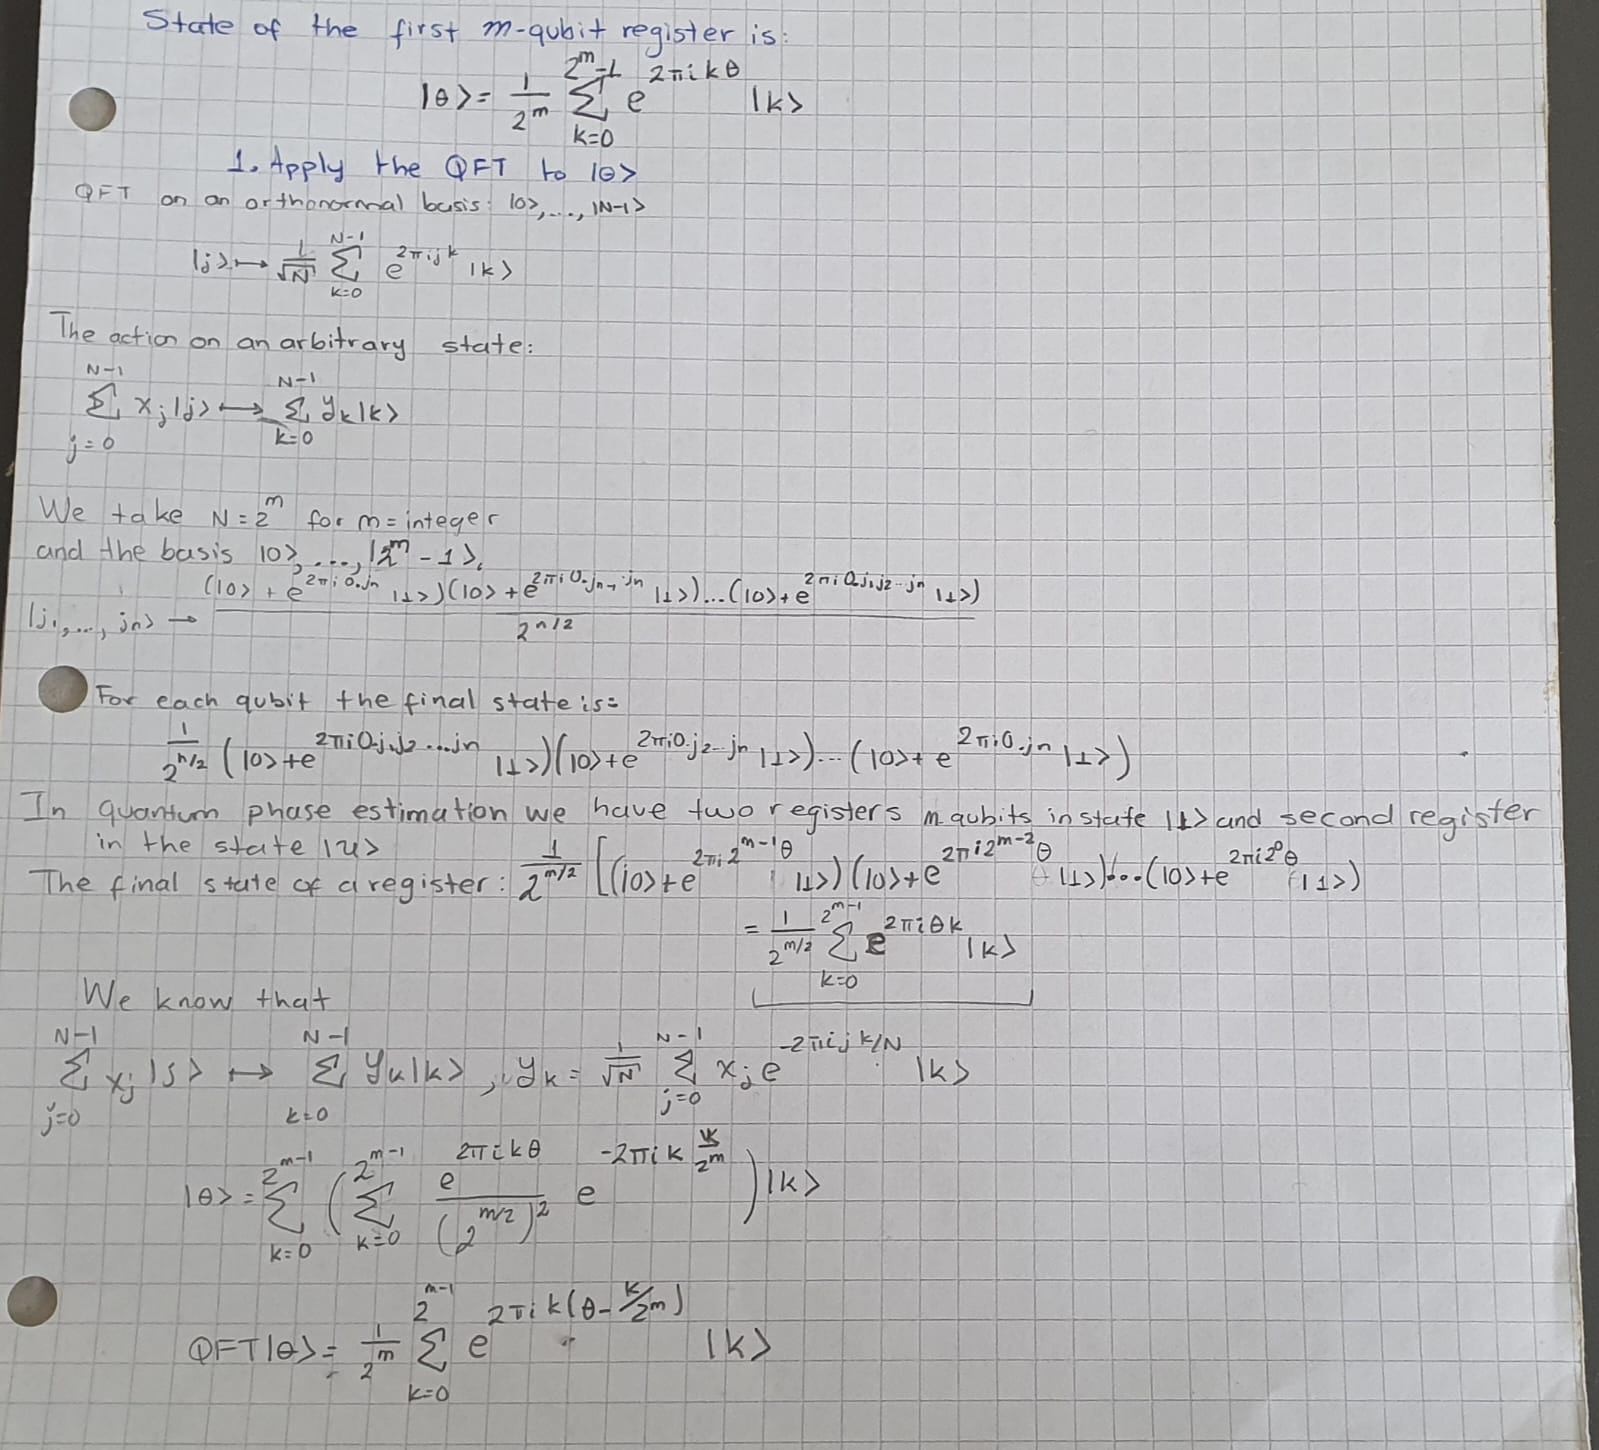

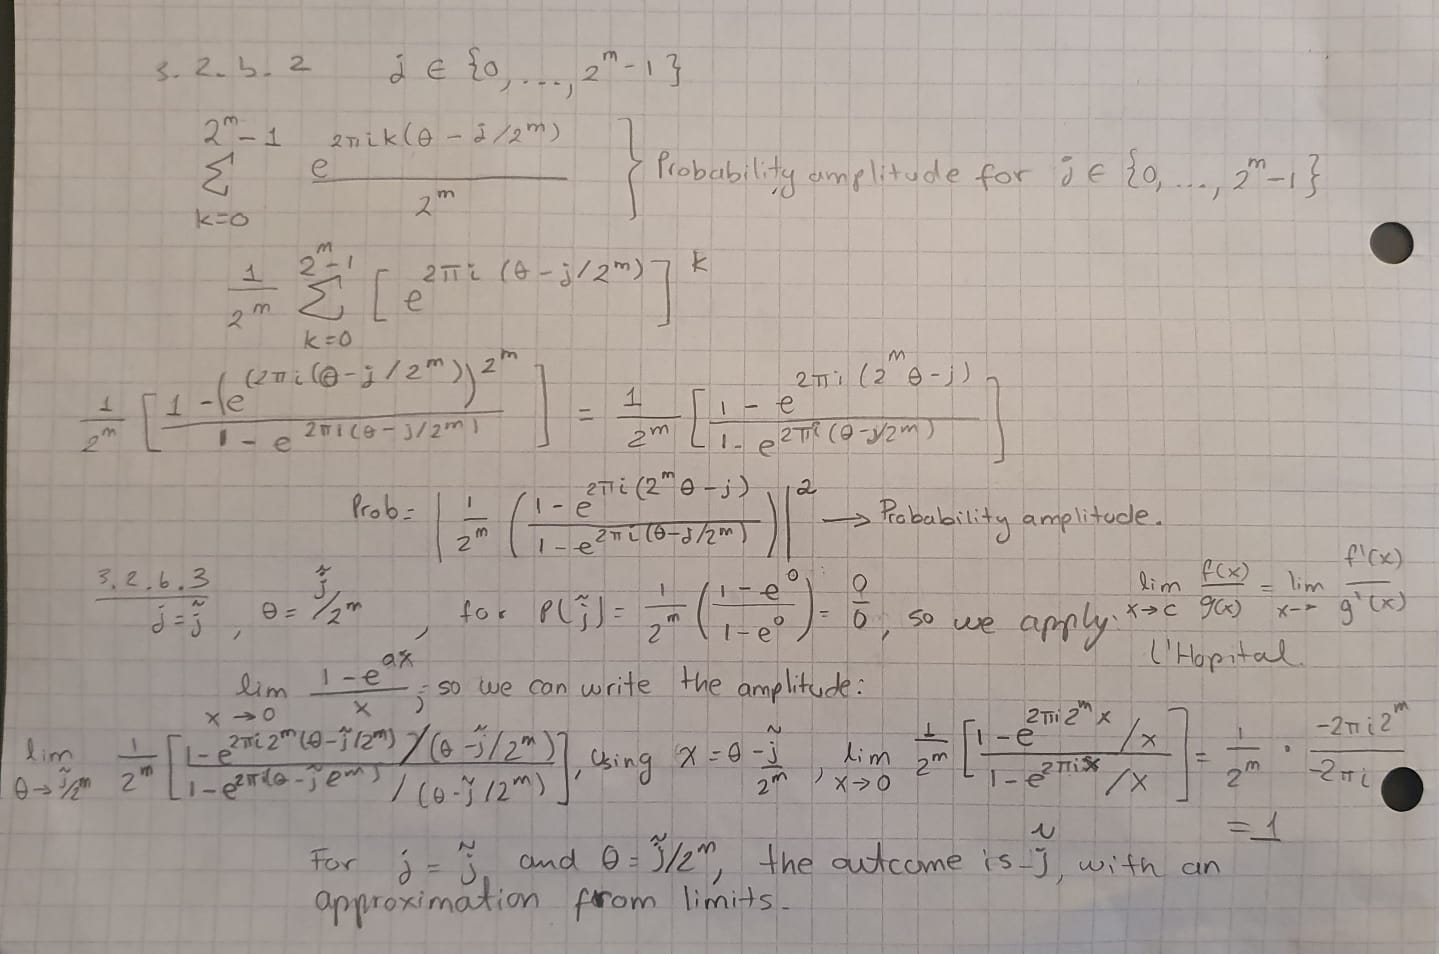

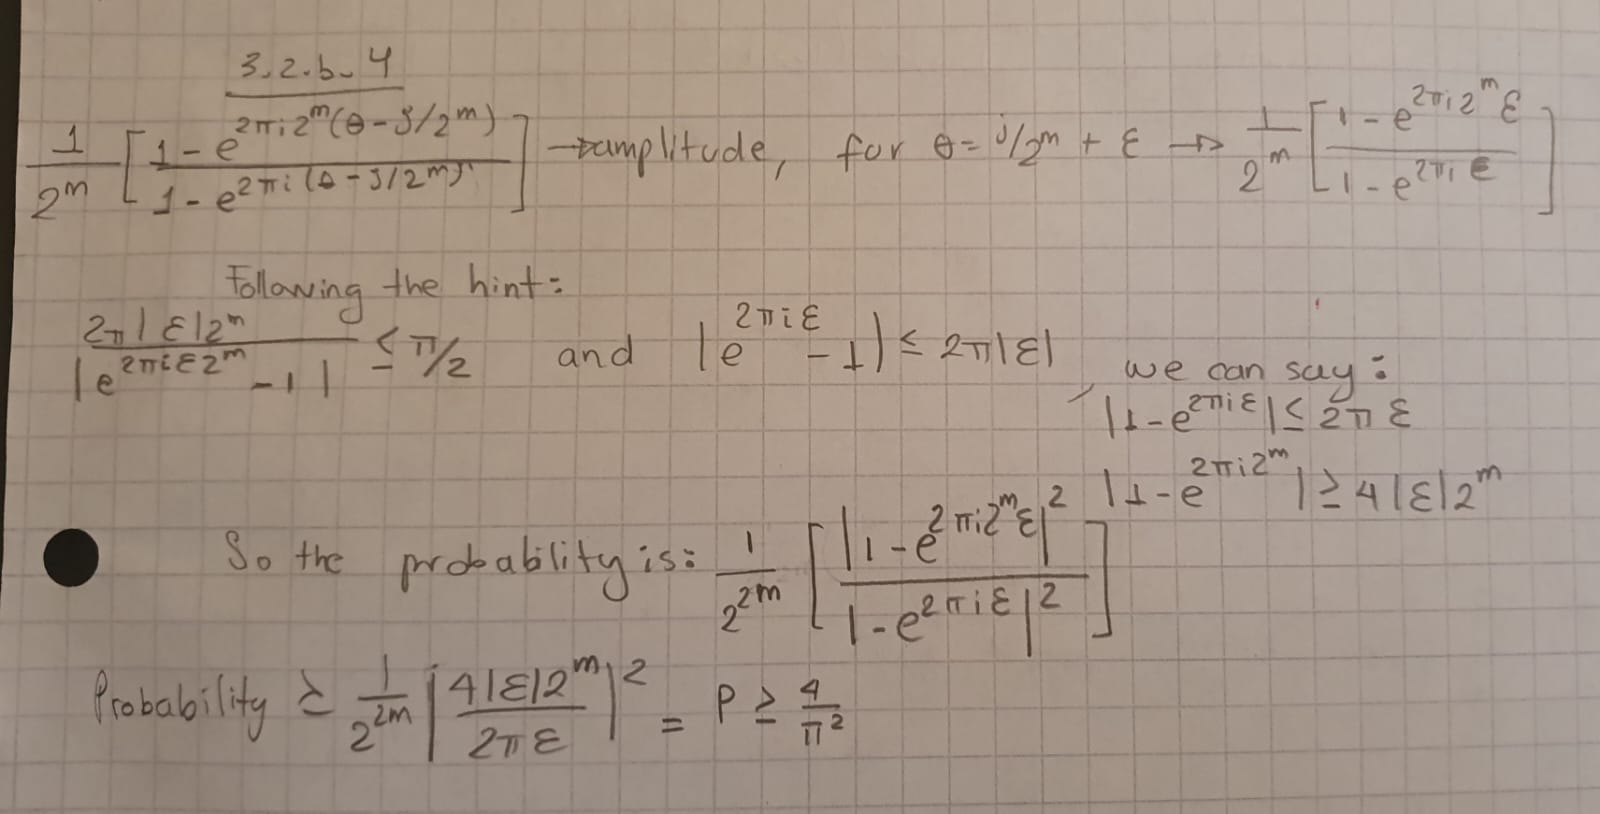

# 3.3 - Period finding (8 pts. total)
Consider a function $f:\mathbb{Z}_N\to C$, where $C$ is a finite set of values. Suppose that $f$ is known to be periodic; namely:
$$\exists s \in Z_N - \{0\} \mbox{ s.t. } f(x+s)=f(x)\,\,\,\, \forall x \in Z_N$$
Furthermore, in each period, each symbol appears only once.
The goal of this problem is to obtain $s$. For the sake of simplicity, assume $N = 2^n$ for some $n$.

## 3.3.a Classical version (2 pt.)
<ol>
  <li>Show that the periodicity condition implies that $s$ divides $N$. </li>
  <li>Show that the problem can be solved on a classical calculator with $\mathcal{O}(n)$ evaluations of the function $f$, where $n = \log_2 N$.  </li>
</ol>

## 3.3.b Quantum protocol (3 pts.)
Consider an oracle $O_f$, acting as follows:
$$O_f(\ket{x}\ket{b}) = \ket{x}\ket{b\oplus f(x)}$$
where $b$ is a string of length $m$, and $\oplus$ represents the sum modulus $2^m$. Consider the following protocol:
<ul>
  <li>Prepare the state 
    $$\frac{1}{\sqrt{N}} \sum_{x\in Z_N} \ket{x}$$
    These first qubits constitute the <b>first register</b>.
  </li>
  <li> Attach a <b>second register</b> in state $\ket{0^m}$.</li>
  <li> Query the oracle $O_f$ on the current input.</li>
  <li> Measure the second register in the computational basis.</li>
  <li> Apply the QFT to the first register.</li> 
  <li> Measure the first register. </li>
</ul>

<ol>
  <li>Let $c \in C$ be fixed. Show that the probability of obtaining $c$ as measurement outcome on the second register is $\frac{1}{s}$.</li>
  <li>Write the state of the first register after having obtained measuremetn outcome $c$ on the second register.</li>
</ol>

<b>Hint.</b> You may find it use useful to define the auxiliary function 
$$f_c(x) = \begin{cases}1 & \mbox{ if } f(x)=c \\ 0 & \mbox { otherwise}\end{cases}$$

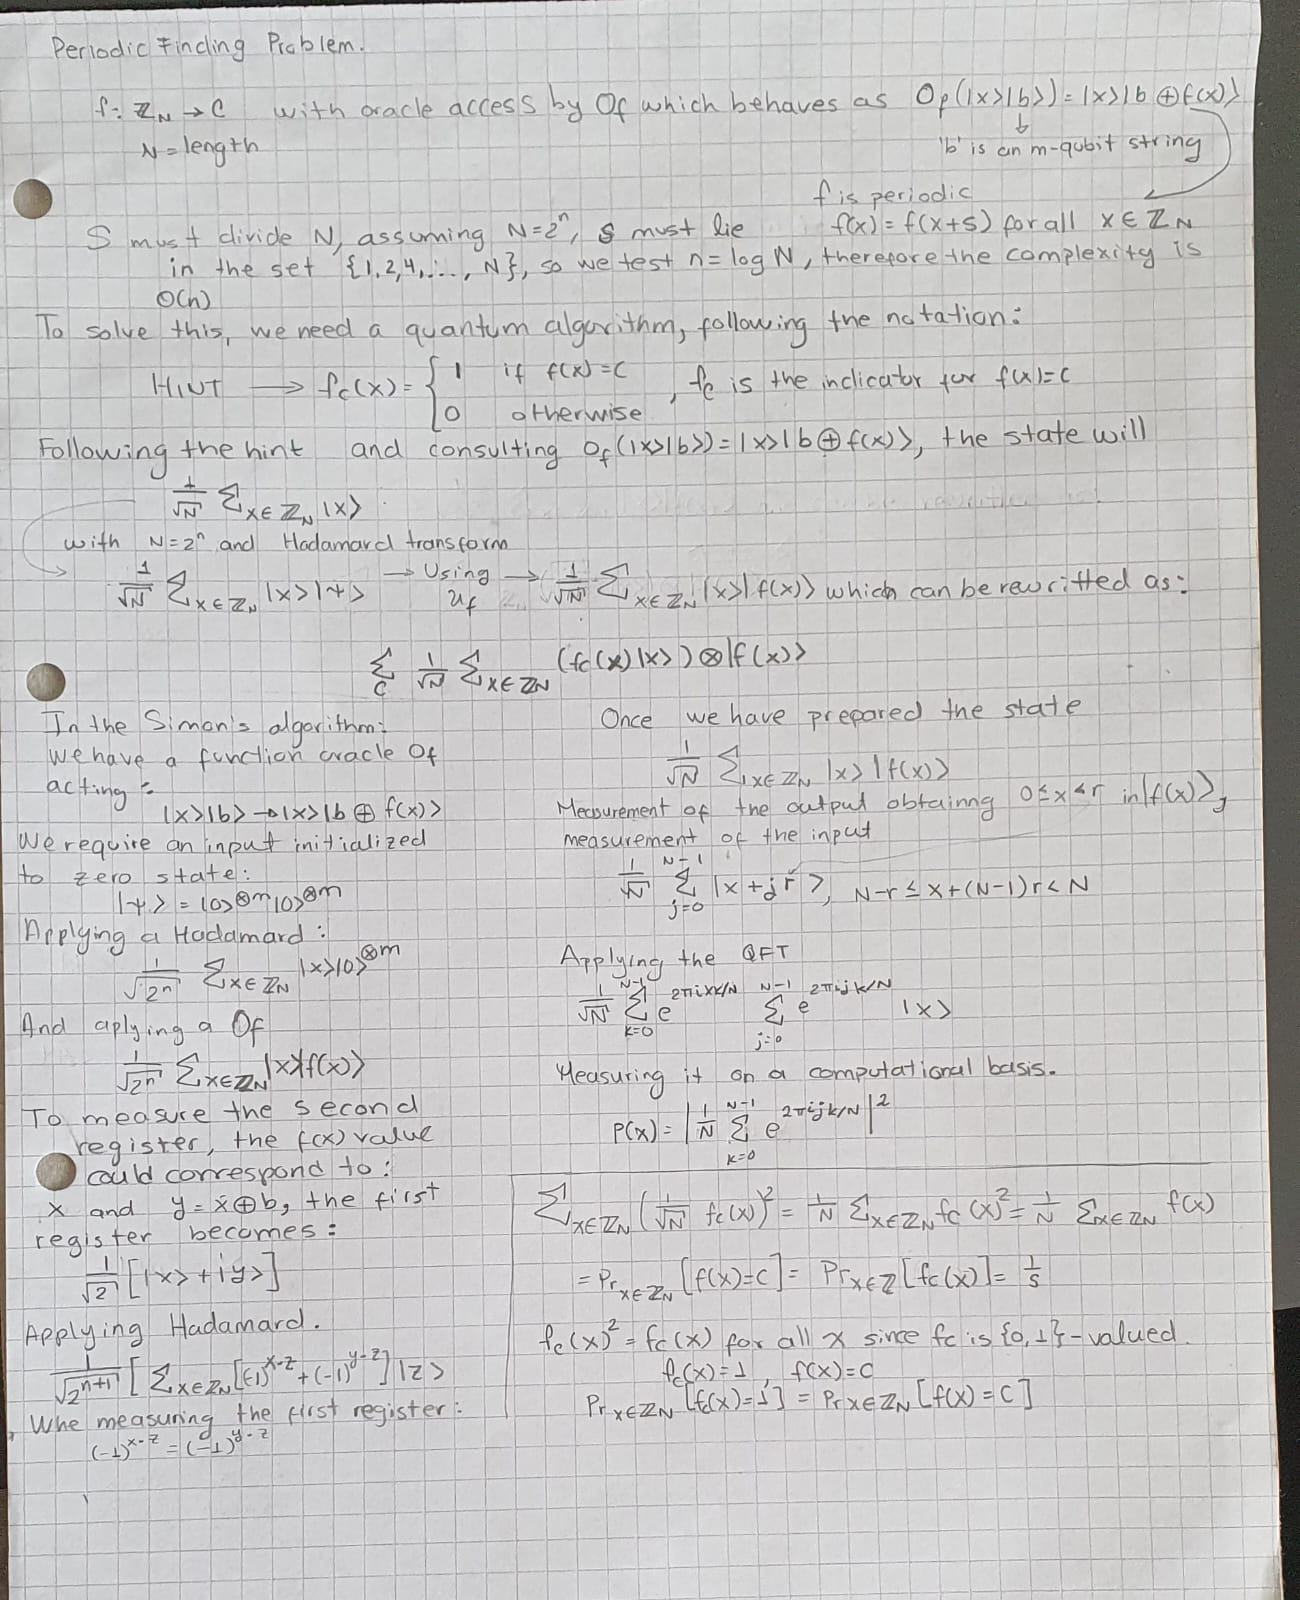

## 3.3.c The Fourier coefficients /1 (1 pt.)
Consider a function $g: \mathbb{Z}_N \to C$ and a number $t \in \mathbb{Z}_N$. Let $k: \mathbb{Z}_N \to C$ be another function such that $k(x) = g(x+t)$. Show that $g$ and $k$ have the same Fourier coefficients, except for a multiplicative factor of absolute value 1.

Notice that it follows that the measurement outcome on the first register does not depend on the $c$ we measured on the second register. Without loss of generality, we can hence assume to have measured $f(0)=c$. Therefore:
$$f_c(x)=\begin{cases}1 & \mbox{ if } x=0,s,2s,\ldots \\ 0 & \mbox{ otherwise}\end{cases}$$

## 3.3.d The Fourier coefficients /2 (1 pt.)
Prove that $f_c(x)$ defined in this way has Fourier coefficients given by:
$$\hat{f_c}(\gamma) = \begin{cases}\frac{1}{s} & \mbox{ if } \gamma \in \{0, N/s, 2N/s,\ldots\} \\ 0 & \mbox{ otherwise}\end{cases}$$

It follows that, when performing the measurement on the first register, we are sampling uniformly a value of $\gamma$ from the set $\{0, N/s, 2N/s, \ldots \}$, or equivalently from the $\gamma$ values such that $\gamma s =0 \mod N$.

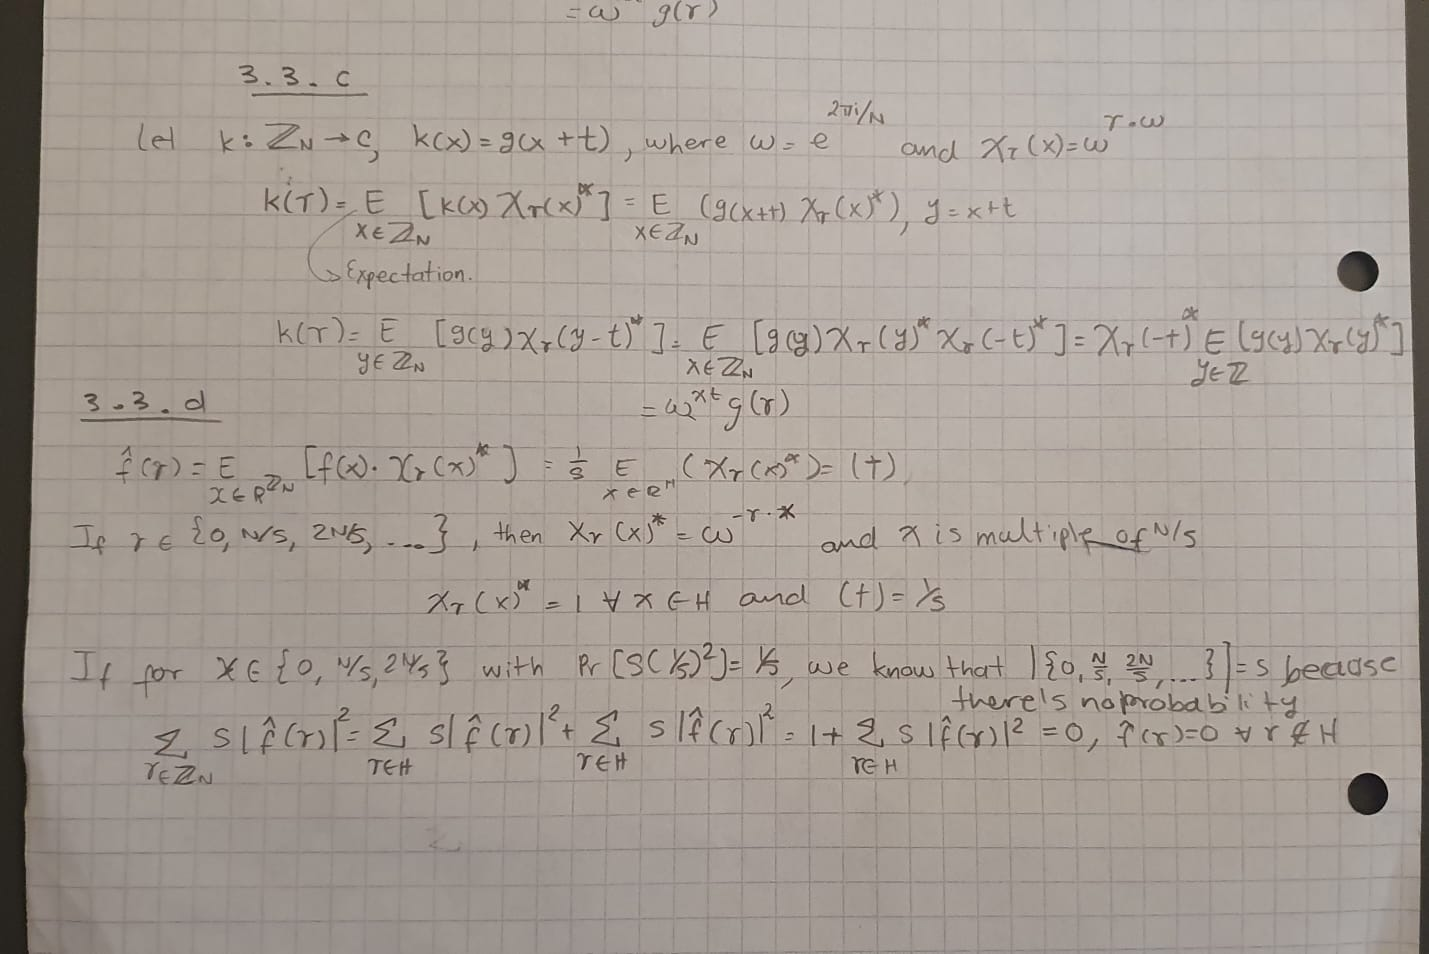

## 3.3.e Finding the period (1 pt.)
Describe how the measurement outcomes obtained from the measurement on the first register can be used to find the period of the function $f$.

# 3.4 - Factoring (6 pts. total)
The aim of this exercise is to build a specific implementation of Shor's factoring algorithm, which will allow factorisation of the number $15$. 

## 3.4.a Classical auxiliary functions  (1 pt.)
First of all, some classical subroutines are required. Write the following Python functions:
<ol>
    <li> <code>gcd(x,y)</code>, which computes the greatest common divisor between the numbers <code>x</code> and <code>y</code>. </li>
    <li> <code>verify_factor(N,x)</code>, which verifies whether <code>x</code> is a factor of <code>N</code>. 
</ol>
Discuss the scaling of the computational complexity of the latter function in terms of the number of bits required to encode $N$ and in reference to the complexity class *NP*.

In [10]:
def gcd(x, y):
    while y != 0:
        (x, y) = (y, x % y)
        return x

def verify_factor(N, x):
    if (N%x == 0) and (N >= x) :
         return True
    else:
        return False


## 3.4.b Classical period finding (1 pt.)
Consider the function
$$f(x) = a^x \mod N$$
where $a$, $x$ and $N$ are numbers in $\mathbb{N}$, and $a$ is prime. It can be shown that the function $f(x)$ is periodic, and that each value of $f(x)$ appears only once in each period.

Define a Python function <code>classical_period_find(a,N)</code> that computes the period of the function $f(x)$ of the form specified above, for given $a$ and $N$. Discuss the complexity of the function, in terms of the bits required to encode $N$.

Next, define a Python function <code>period_verify(a,N,p)</code>, which verifies whether the proposed $p$ is the correct period of $f(x)$. Discuss its complexity in terms of the bits required for encoding $N$. Discuss the relation between <code>classical_period_find</code> and <code>period_verify</code> in reference to the complexity class *NP*.

In [11]:
def classical_period_find(a, N):
    f = lambda x, a, N: a**x % N 
    f_initial= f(1, a, N) 
    x = 2
    while f_initial != f(x, a, N): 
        x+=1 
        
    return x -2 +1 

def period_verify(a, N, ans):
    if classical_period_find(a, N) == ans:
        return True
    else:
        return False




classical_period_find(2, 15)
period_verify(2, 15,4)

True

In [12]:
period_verify(2,10,8)

False

## 3.4.c Quantum period finding (2pt.)
For the specific case of $a=2$, $N=15$, write the Qiskit code for quantum period finding (Shor's algorithm). 

In [13]:

a=2
N=15
def period_finding(n, p): 
    if n not in [2,7,8,11,13]:
        return 0
    
    Q = QuantumCircuit(4)
    
    for i in range(p):
        if n in [2,13]:
            Q.swap(0,1)
            Q.swap(1,2)
            Q.swap(2,3)
        if n in [7,8]:
            Q.swap(2,3)
            Q.swap(1,2)
            Q.swap(0,1)
        if n == 11:
            Q.swap(1,3)
            Q.swap(0,2)
        if n in [7,11,13]:
            for q in range(4):
                Q.x(q)
                
    Q = Q.to_gate()
    c_Q = Q.control()
    return c_Q

counts=4
def shor_circuit(a, N, n_count = 4):
    qc = QuantumCircuit(n_count + 4, n_count)

    
    qc.h(range(counts))
        
    
    qc.x(3 + counts)

   
    for q in range(counts):
        qc.append(period_finding(a, 2**q), 
                [q] + [i+counts for i in range(4)])

    
    invesrse(qc,counts)
    return qc


qc = shor_circuit(a, N)


qc.measure(range(counts), range(counts))
qc.draw() 

┌───┐                                                                   »
q_0: ┤ H ├───────■─────────────────────────────────────────────────────────X─»
     ├───┤       │                                                         │ »
q_1: ┤ H ├───────┼───────────────■───────────────────────────────X─────────┼─»
     ├───┤       │               │                               │         │ »
q_2: ┤ H ├───────┼───────────────┼───────────────■───────────────X─────────┼─»
     ├───┤       │               │               │                         │ »
q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■─────────X─»
     └───┘┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐   »
q_4: ─────┤0             ├┤0             ├┤0             ├┤0             ├───»
          │              ││              ││              ││              │   »
q_5: ─────┤1             ├┤1             ├┤1             ├┤1             ├───»
          │  circuit-158 ││  circuit-168 ││  circuit-181 ││  circuit-200 │   »
q_6: ─────┤2             ├┤2             ├┤2             ├┤2             ├───»
     ┌───┐│              ││              ││              ││              │   »
q_7: ┤ X ├┤3             ├┤3             ├┤3             ├┤3             ├───»
     └───┘└──────────────┘└──────────────┘└──────────────┘└──────────────┘   »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───┐                                                            ┌─┐»
«q_0: ┤ H ├─■──────────────■───────────────────■───────────────────────┤M├»
«     └───┘ │P(-π/2) ┌───┐ │                   │                       └╥┘»
«q_1: ──────■────────┤ H ├─┼─────────■─────────┼──────────────■─────────╫─»
«                    └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │         ║ »
«q_2: ─────────────────────■─────────■─────────┼────────┤ H ├─┼─────────╫─»
«                                              │P(-π/8) └───┘ │P(-π/4)  ║ »
«q_3: ─────────────────────────────────────────■──────────────■─────────╫─»
«                                                                       ║ »
«q_4: ──────────────────────────────────────────────────────────────────╫─»
«                                                                       ║ »
«q_5: ──────────────────────────────────────────────────────────────────╫─»
«                                                                       ║ »
«q_6: ──────────────────────────────────────────────────────────────────╫─»
«                                                                       ║ »
«q_7: ──────────────────────────────────────────────────────────────────╫─»
«                                                                       ║ »
«c: 4/══════════════════════════════════════════════════════════════════╩═»
«                                                                       0 »
«                             
«q_0: ────────────────────────
«               ┌─┐           
«q_1: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_2: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_3: ─■─────────╫─┤ H ├─╫─┤M├
«                ║ └───┘ ║ └╥┘
«q_4: ───────────╫───────╫──╫─
«                ║       ║  ║ 
«q_5: ───────────╫───────╫──╫─
«                ║       ║  ║ 
«q_6: ───────────╫───────╫──╫─
«                ║       ║  ║ 
«q_7: ───────────╫───────╫──╫─
«                ║       ║  ║ 
«c: 4/═══════════╩═══════╩══╩═
«                1       2  3

In [14]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')
result = list(aer_sim.run(transpile(qc, aer_sim)).result().get_counts().keys())
end_result = [int(r, 2) for r in result]
end_result

[12, 0, 8, 4]

Pass the most frequent outcomes to the following function, which estimates the compatible periods using a variant of the continuous-fractions algorithm. You can verify which one of the candidates is the correct period using the <code>period_verify</code> function.

In [15]:
def estimate_period(x):
    r_range = 16
    if x < r_range/2:
        x = r_range - x
    candidates=[]
    real=x/r_range
    b = 1.
    n0 = 0
    n1 = 1
    n2 = 0
    
    for denominator in range(1, x):
        numerator = round(denominator * real)
        estimated = numerator / denominator 
        error = abs(estimated - real)
        
        n0 = n1
        n1 = n2
        n2 = error
        
        if n1 <= b and n1 < n0 and n1 < n2:
            repeat_period = denominator - 1
            candidates.append(denominator - 1)
            b = n1
            
        if 0 in candidates:
            candidates.remove(0)
        
    return candidates

def period(result): 

    for r in result:
        guess = estimate_period(r)
        
        for g in guess:
            if period_verify(a, N, g):
                return g
p= period(end_result)
print(p)
period_verify(a,N, p)

4


True

## 3.4.d Prime factoring (1 pt.)
Now, use the function <code>gcd</code> to return the factorisation of the number $15$ from Shor's algorithm. If $p$ is the period of the function $f(x)$, then one of $N$'s prime factor might be given by 
$$\gcd\left(N, a^{p/2}+1\right)$$
or by
$$\gcd\left(N, a^{p/2}-1\right)$$

In [16]:
print(gcd(N, a**(p/2)+1))
print(gcd(N, a**(p/2)-1))

5.0
3.0


## 3.4.e Order finding and period finding (1 pt.)
In this exercise, you have built Shor's factorisation algorithm in a sligthly different way than in the class, based on the <b>period finding</b> rather than on the <b>order finding</b>.

Period finding, as discussed above, aims at finding the least positive $r$ such that:
$$f(x+r) = f(x) \,\,\,\,\, \forall x$$

Order finding considers a specific function of the form:
$$ f(x) = a^x \mod N$$
and aims at finding the least $x\neq 0$ such that $f(x) = 1$. 

Show that order finding is a subclass of period finding. 